In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Problem 1. Adaptive Histogram Equalization

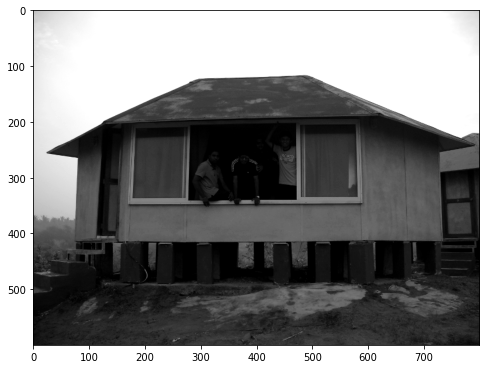

In [2]:
# Problem 1

img = cv2.imread('beach.png',0)
plt.figure(figsize=(8,8))
plt.imshow(img, cmap = 'gray')

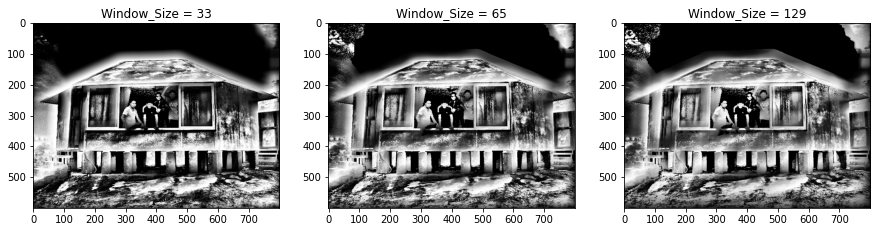

In [3]:
# Adaptive histogram equalization

def AHE(input_img, win_size):
    row = input_img.shape[0]
    col = input_img.shape[1]
    pad_size = int(win_size / 2)
    img_map = input_img
    img_pad = np.pad(input_img, (pad_size, pad_size), mode='symmetric')
    for r in range(row):
        for c in range(col):
            center = img_pad[r + pad_size,c + pad_size]
            rank = 0
            c_region = img_pad[r + pad_size:r + win_size + pad_size, c + pad_size:c + win_size + pad_size]
            rank = sum(sum(c_region < center))
            img_map[r,c] = rank * 255 / (win_size ** 2)

    return img_map

windows = [33,65,129]
f = plt.figure(figsize=(15,5))
titles = ['Window_Size = 33', 'Window_Size = 65', 'Window_Size = 129']
for i, t in enumerate(titles):
    img_AHE = AHE(img,windows[i])
    f.add_subplot(131 + i)
    plt.title(t)
    plt.imshow(img_AHE, cmap = 'gray')

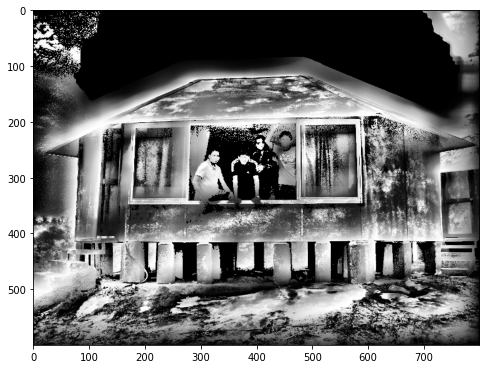

In [4]:
#Histogram equalization
img_HE = cv2.equalizeHist(img)
plt.figure(figsize=(8,8))
plt.imshow(img_HE, cmap = 'gray')

Histogram equalization would "flatten" the historgram, which means the histogram of image tends to be uniform. With this technique, the contrast would become higher than before. As we can see in this result, the black part in middle of image becomes brighter and faces can be clearly observed. In summary, histogram equalization distributes intensities to all level in histogram and get high contrast image. Also, larger window size in AHE enhances this effect.

Adaptive histogram equalization peroforms better due to its neighboring processing characteristics. AHE applies histogram equalization in each subimage, and this increases local contrast and enhances definitions of edges in each region of an image. Compare to global HE, AHE has a tendency to overamplify noise in relatively homogeneous regions of an image. In HE, noise would be distributive to all level including noises, which causes unexected artifacts in image. This is general difference between HE and AHE.

Problem 2. Binary Morphology

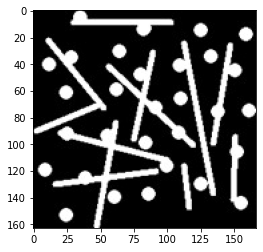

In [5]:
img_2 = cv2.imread('circles_lines.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_2, cmap = 'gray')

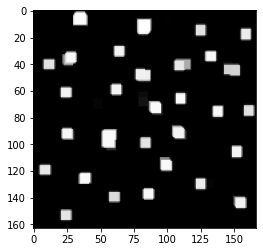

In [6]:
from skimage.morphology import opening

kernel = np.ones((7,7),np.uint8) # Structural element
img_2_open = cv2.morphologyEx(img_2, cv2.MORPH_OPEN, kernel)
plt.imshow(img_2_open, cmap = 'gray')

There are: 32 circles in this image.


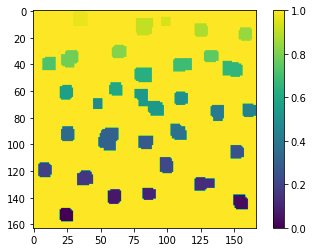

In [7]:
from scipy.ndimage.measurements import label

label_map, num_features = label(img_2_open)
label_map_show = (np.max(label_map) - label_map) / (np.max(label_map) - np.min(label_map))
plt.imshow(label_map_show)
plt.colorbar()
print("There are:", num_features , "circles in this image.") # -1 because of background label

In [8]:
record_coor = np.zeros([2,num_features])
area = np.zeros([num_features])

for i in range(len(label_map)):
    for j in range(len(label_map[0])):
        if label_map[i][j] != 0:
            label = label_map[i][j]-1
            record_coor[0][label] += i
            record_coor[1][label] += j
            area[label] += 1

centroid = record_coor / area
print("List of centroids of circles(x,y):")
for i in range(len(centroid[0])):
    print(int(centroid[0][i]), int(centroid[1][i]))

List of centroids of circles(x,y):
5 34
8 99
11 82
14 125
17 158
30 64
35 27
33 132
39 11
40 111
43 148
47 82
58 61
61 24
68 86
65 110
69 48
74 161
76 137
90 108
92 25
95 56
98 83
105 152
115 99
119 8
125 38
129 127
136 86
138 60
143 154
152 24


In [9]:
print('Areas of circles(ordered from top to bottom):',area)

Areas of circles(ordered from top to bottom): [127.  49. 159.  96.  94. 102. 144.  94.  98. 134. 160. 138.  94. 102.
 235.  94.  56.  95. 110. 127. 104. 216. 105.  95. 113. 103. 120. 129.
  85. 103. 112.  95.]


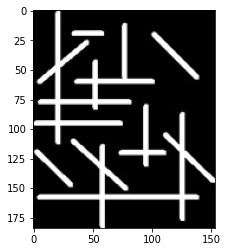

In [10]:
img_2_line = cv2.imread('lines.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_2_line, cmap = 'gray')

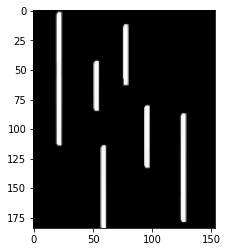

In [11]:
kernel = np.ones((20,2),np.uint8) # Structural element
img_2_line_open = cv2.morphologyEx(img_2_line, cv2.MORPH_OPEN, kernel)
plt.imshow(img_2_line_open, cmap = 'gray')

There are: 6 lines in this image.


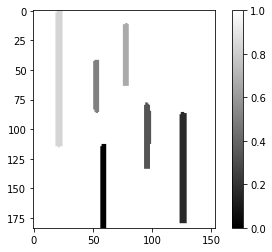

In [12]:
from scipy.ndimage.measurements import label
label_map_line, num_features_line = label(img_2_line_open)
label_map_show_line = (np.max(label_map_line) - label_map_line) / (np.max(label_map_line) - np.min(label_map_line))

plt.figure
plt.imshow(label_map_show_line, cmap = 'gray')
plt.colorbar()
print("There are:", num_features_line , "lines in this image.") 

In [13]:
record_coor_line = np.zeros([2,num_features_line])
area_line = np.zeros([num_features_line])
line_top = np.ones(num_features_line) * 255
line_down = np.zeros([num_features_line])

for i in range(len(label_map_line)):
    for j in range(len(label_map_line[0])):
        if label_map_line[i][j] != 0:
            label = label_map_line[i][j]-1
            record_coor_line[0][label] += i
            record_coor_line[1][label] += j
            area_line[label] += 1
            line_top[label] = min(line_top[label], i)
            line_down[label] = max(line_down[label], i)

centroid_line = record_coor_line / area_line
print("List of centroids of vertical lines(x,y):")
for i in range(len(centroid_line[0])):
    print(int(centroid_line[0][i]), int(centroid_line[1][i]))

List of centroids of vertical lines(x,y):
57 21
37 78
63 53
105 96
132 126
148 59


Problem 3. Lloyd-Max Quantizer

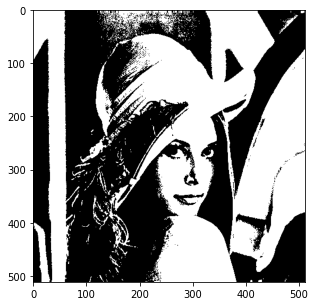

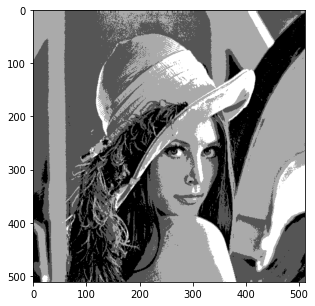

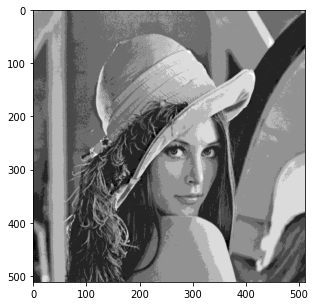

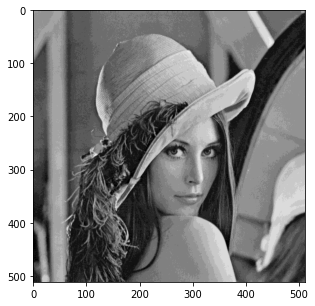

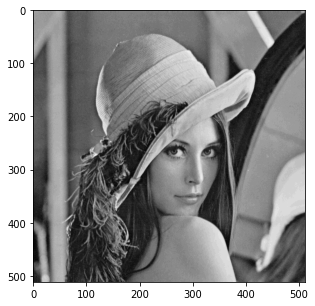

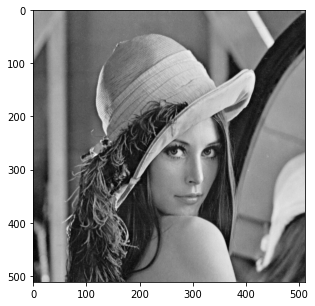

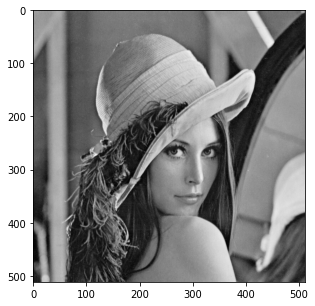

In [14]:
def uniform_quantization(image, s):
    row, col = image.shape
    step = 256 / 2 ** s
    partition = np.array([step * (i+1) for i in range(2 ** s - 1)])
    codebook = np.array([int(step * (i + 1/2)) for i in range(2 ** s)])
    intervals = np.array(np.searchsorted(partition, image))
    img_quant = codebook[intervals]
    error = img_quant - image
    MSE_u = np.sum(error ** 2) / row / col
    return MSE_u, img_quant

img_lena = cv2.imread('lena512.tif', cv2.IMREAD_GRAYSCALE)
for i in range(7):
    MSE_uq_tmp, img_uni_quant = uniform_quantization(img_lena, i+1)
    f = plt.figure(figsize=(5,5))
    plt.imshow(img_uni_quant, cmap = 'gray')

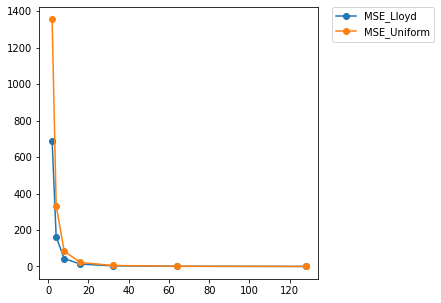

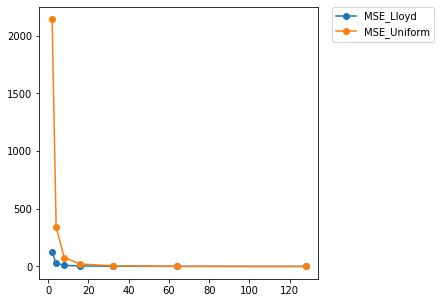

In [15]:
from lloyd_python import lloyds

def lloyd_quant(image, s):
    row, col = image.shape
    partition, codebook = lloyds(image.reshape([-1,1]), [2**s])
    intervals = np.searchsorted(partition, image)
    img_quant = codebook[intervals]
    error = image - img_quant
    MSE = np.sum(error ** 2) / row / col
    return MSE, img_quant

def MSE_calc(image, method):
    MSE_list = []
    for i in range(7):
        if(method == 'lloyd'):
            MSE_tmp, img_tmp = lloyd_quant(image, i+1)
        else:
            MSE_tmp, img_tmp = uniform_quantization(image, i+1)
        MSE_list.append(MSE_tmp)
        if i == 1:
            img_show = img_tmp
    return MSE_list, img_show
        
img_lena = cv2.imread('lena512.tif')
img_lena = cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY)
img_diver = cv2.imread('diver.tif')
img_diver = cv2.cvtColor(img_diver, cv2.COLOR_BGR2GRAY)

MSE_lena_uq_list, imshow_lena_uq = MSE_calc(img_lena, 'uniform')
MSE_lena_ll_list, imshow_lena_ll = MSE_calc(img_lena, 'lloyd')

MSE_diver_uq_list, imshow_diver_uq = MSE_calc(img_diver, 'uniform')
MSE_diver_ll_list, imshow_diver_ll = MSE_calc(img_diver, 'lloyd')

fig_x = [2**(i+1) for i in range(7)]
f = plt.figure(figsize=(5,5))
plt.plot(fig_x, MSE_lena_ll_list, "o-", label = 'MSE_Lloyd')
plt.plot(fig_x, MSE_lena_uq_list, "o-", label = 'MSE_Uniform')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

f = plt.figure(figsize=(5,5))
plt.plot(fig_x, MSE_diver_ll_list, "o-", label = 'MSE_Lloyd')
plt.plot(fig_x, MSE_diver_uq_list, "o-", label = 'MSE_Uniform')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In MSE result, we can realize that Lloyd-max quantizer performs better in all s-bit image, and both of two converges. The reason of larger performance gap in uniform quantization is uniform quantization not considered the difference between true and transformed image. In comparison, Lloyd-max quantizer was design by consideration of this difference. In 2-bit quantized image below, we can observe that image by Lloyd-max quantizer perserved more details than the other one, especially for regions with low contrast. 

Text(0.5, 1.0, 'Lloyd-Max Quantization')

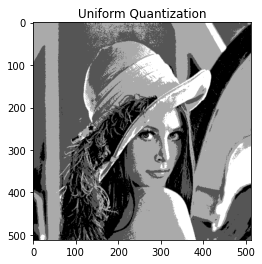

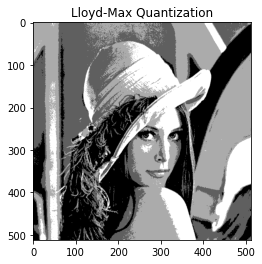

In [16]:
plt.figure()
plt.imshow(imshow_lena_uq, cmap = 'gray')
plt.title('Uniform Quantization')
plt.figure()
plt.imshow(imshow_lena_ll, cmap = 'gray')
plt.title('Lloyd-Max Quantization')

Text(0.5, 1.0, 'Lloyd-Max Quantization')

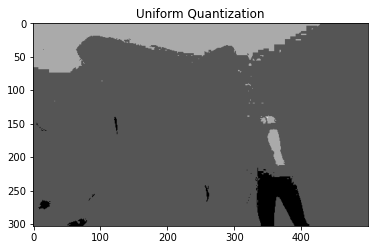

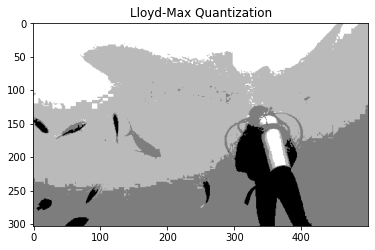

In [17]:
plt.figure()
plt.imshow(imshow_diver_uq, cmap = 'gray')
plt.title('Uniform Quantization')
plt.figure()
plt.imshow(imshow_diver_ll, cmap = 'gray')
plt.title('Lloyd-Max Quantization')

Histogram Equalization and Quantization

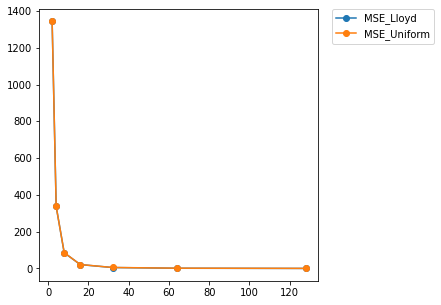

In [18]:
img_lena_HE = cv2.equalizeHist(img_lena)
MSE_lena_HE_uq_list, imshow_lena_uq = MSE_calc(img_lena_HE, 'uniform')
MSE_lena_HE_ll_list, imshow_lena_ll = MSE_calc(img_lena_HE, 'lloyd')

fig_x = [2**(i+1) for i in range(7)]
f = plt.figure(figsize=(5,5))
plt.plot(fig_x, MSE_lena_HE_ll_list, "o-", label = 'MSE_Lloyd')
plt.plot(fig_x, MSE_lena_HE_uq_list, "o-", label = 'MSE_Uniform')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Text(0.5, 1.0, 'Lloyd-Max Quantization')

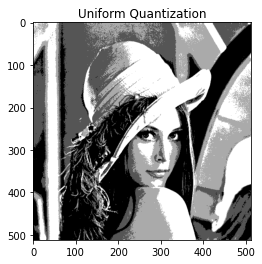

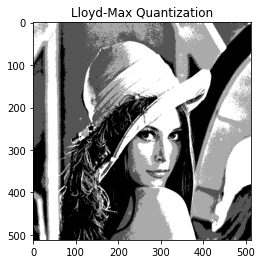

In [19]:
plt.figure()
plt.imshow(imshow_lena_uq, cmap = 'gray')
plt.title('Uniform Quantization')
plt.figure()
plt.imshow(imshow_lena_ll, cmap = 'gray')
plt.title('Lloyd-Max Quantization')

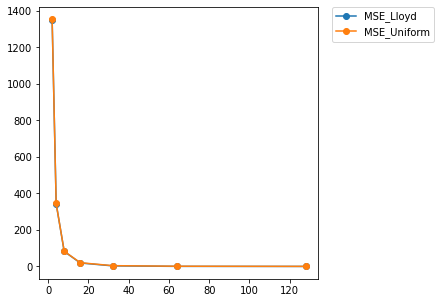

In [20]:
img_diver_HE = cv2.equalizeHist(img_diver)
MSE_diver_HE_uq_list, imshow_diver_uq = MSE_calc(img_diver_HE, 'uniform')
MSE_diver_HE_ll_list, imshow_diver_ll = MSE_calc(img_diver_HE, 'lloyd')

fig_x = [2**(i+1) for i in range(7)]
f = plt.figure(figsize=(5,5))
plt.plot(fig_x, MSE_diver_HE_ll_list, "o-", label = 'MSE_Lloyd')
plt.plot(fig_x, MSE_diver_HE_uq_list, "o-", label = 'MSE_Uniform')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Text(0.5, 1.0, 'Lloyd-Max Quantization')

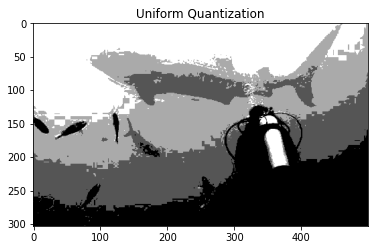

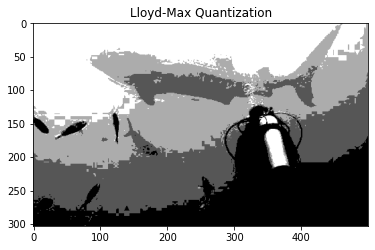

In [21]:
plt.figure()
plt.imshow(imshow_diver_uq, cmap = 'gray')
plt.title('Uniform Quantization')
plt.figure()
plt.imshow(imshow_diver_ll, cmap = 'gray')
plt.title('Lloyd-Max Quantization')

(iii)(iv)In my result, there's no significant difference between two quantization after appling histogram equalization. After global histogram equalization, the distribution of pixel values is almost uniform, so the gap between these two MSE curves is negligible when the number of quantization bits is small. After equalization, the pixels values are mapped to less than 64 bins, so the MSE for Lloyd-Max quantizer with 7 quantization bit is 0. In summary, no differebce in small/large quantization bit indicate similat MSE result.

Problem 4. Quantization with Dithering

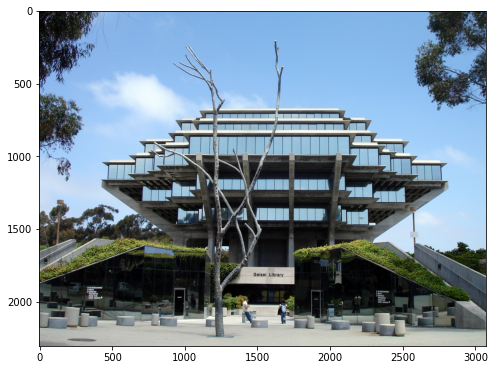

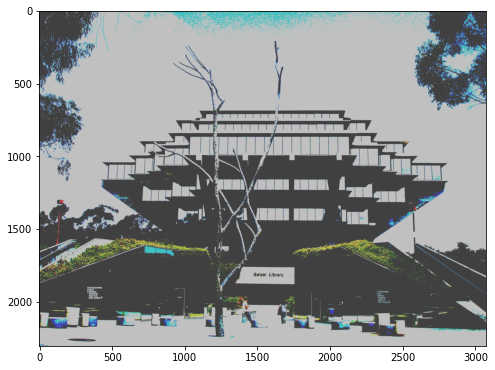

In [22]:
def uniform_quantization_BGR(image, s):
    row, col, channel = image.shape
    step = 256 / s
    partition = np.array([int(step * (i+1)) for i in range(s-1)])
    codebook = np.array([int(step * (i + 1/2)) for i in range(s)])
    intervals = np.array(np.searchsorted(partition, image))
    img_quant = codebook[intervals]
    #error = img_quant - image
    #MSE_u = np.sum(error ** 2) / row / col / channel
    return img_quant
        
img_BGR = cv2.imread('geisel.jpg')
img_BGR = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
img_BGR_uq = uniform_quantization_BGR(img_BGR, 2)

f = plt.figure(figsize=(8,8))
plt.imshow(img_BGR)
f = plt.figure(figsize=(8,8))
plt.imshow(img_BGR_uq)

In [23]:
def FSD(image):
    row, col, channel = image.shape
    image_quant = uniform_quantization_BGR(image, 10)
    quant_error = image - image_quant
    image_output = image
    for y in range(row):
        for x in range(col):
            for ch in range(channel):
                if(x + 1 < col):
                    image_output[y][x+1][ch] += int(quant_error[y][x][ch] * 7 / 16)
                if(y + 1 < row and x - 1 >= 0):
                    image_output[y+1][x-1][ch] += int(quant_error[y][x][ch] * 3 / 16)
                if(y + 1 < row):
                    image_output[y+1][x][ch] += int(quant_error[y][x][ch] * 5 / 16)
                if(x + 1 < col and y + 1 < row):
                    image_output[y+1][x+1][ch] += int(quant_error[y][x][ch] / 16)
    
    return image_output

img_BGR_FSD = FSD(img_BGR)

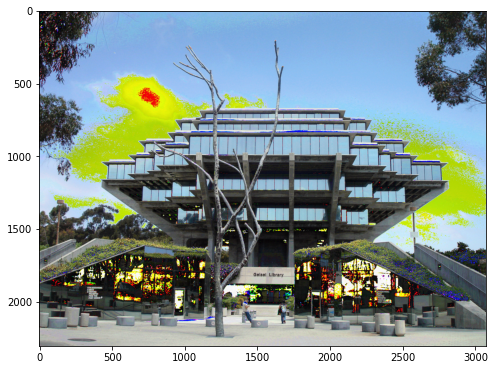

In [24]:
f = plt.figure(figsize=(8,8))
plt.imshow(img_BGR_FSD)

1. With uniform quantization only, the intensities level are less than the one with Floyd-Steinberg Dithering. Also, we can observe the blue channel enhances in boundary of blue background, especially in tree in the top of image. The dithering one shows large color range by the effects and more details are preserved (look at the people and stones). In addition, the color in white regions change because of diffusion of colour palette over neighbouring pixels.

2.  Floyd-Steinberg Dithering preserves more details by making use of a principle called error diffusion, meaning it pushes (adds) the residual quantization error of a pixel onto its neighboring pixels, to be dealt with later. From wiki:
"The algorithm scans the image from left to right, top to bottom, quantizing pixel values one by one. Each time the quantization error is transferred to the neighboring pixels, while not affecting the pixels that already have been quantized. Hence, if a number of pixels have been rounded downwards, it becomes more likely that the next pixel is rounded upwards, such that on average, the quantization error is close to zero."